In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("APSfailure.csv")

/home/derdman/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,81,85,95,96,97,100,101,102,103,104,105,106,107,108,109,114,115,116,117,118,119,120,121,122,123,159,160,161,162,163,164,165,166,167,168,242,243,244,245,246,247,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
oddrow=data.iloc[59999,:]

In [4]:
data.dropna()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,Unnamed: 331,Unnamed: 332,Unnamed: 333,Unnamed: 334,Unnamed: 335,Unnamed: 336,Unnamed: 337,Unnamed: 338,Unnamed: 339,Unnamed: 340
59999,neg,40222,na,698,628,0,0,0,0,0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0


In [5]:
oddrow1=oddrow.iloc[170:]

In [6]:
oddrow2=oddrow.iloc[:171]

In [7]:
data=data.drop(59999,axis=0)

In [8]:
data=data.dropna(axis=1)

In [9]:
oddrow1=oddrow1.to_frame().transpose()
oddrow2=oddrow2.to_frame().transpose()

In [10]:
oddrow1.columns=data.columns.tolist()[:171]

In [11]:
oddrow2.columns=data.columns.tolist()[:171]

In [12]:
oddrow1["eg_000"]=0
oddrow2["eg_000"]=0

In [13]:
oddrow1["class"]="neg"

In [14]:
oddrow1

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59999,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0


In [15]:
oddrow2

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [16]:
data=data.append(oddrow1)
data=data.append(oddrow2)

In [17]:
data=data.replace("na", -1)

In [18]:
data=data.replace("pos", 1)
data=data.replace("neg", 0)

In [19]:
data=np.matrix(data)

In [20]:
np.random.shuffle(data)

In [21]:
X_train=data[:int(data.shape[0]*70/100),2:].astype(np.float)
X_val=data[int(data.shape[0]*70/100):int(data.shape[0]*85/100),2:].astype(np.float)
X_test=data[int(data.shape[0]*85/100):,2:].astype(np.float)

y_train=data[:int(data.shape[0]*70/100),:1].astype(np.float)
y_val=data[int(data.shape[0]*70/100):int(data.shape[0]*85/100),:1].astype(np.float)
y_test=data[int(data.shape[0]*85/100):,:1].astype(np.float)

In [22]:
X_train.shape[0]+X_test.shape[0]+X_val.shape[0]

76000

In [23]:
def norm(X,X_tr):
    X_tr_min=X_tr.min(0)
    X_tr_max=X_tr.max(0)
    X=(X-X_tr_min)/(X_tr_max-X_tr_min)
    return(X)

In [24]:
X_test=norm(X_test,X_train)
X_val=norm(X_val,X_train)
X_train=norm(X_train,X_train)

In [25]:
y_train.shape

(53200, 1)

In [26]:
np.min(X_train)

0.0

In [27]:
def cost(y,p):
    Err=[]
    for j in range(y.shape[1]):
        if y[j]==1:
            Err.append(-np.log(p[j]))
        else:
            Err.append(-np.log(1-p[j]))
    return np.sum(Err)

In [28]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [29]:
def tanh(X):
    return (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))

In [30]:
epochs=1000
nodes=30
eta=0.00001

In [31]:
w1=np.random.randn(X_train.shape[1],nodes)
w2=np.random.randn(nodes,1)
b1=np.random.randn(1,nodes)
b2=np.random.randn(1,1)
w1_best=w1
w2_best=w2
b1_best=b1
b2_best=b2
errbest=1000000

In [32]:
w1=w1_best
w2=w2_best
b1=b1_best
b2=b2_best

Error=[]
epoch=[]
for i in range(epochs):
    p=sigmoid(tanh(X_train@w1+b1)@w2+b2)    
    w1=w1-eta*X_train.T@(np.multiply((p-y_train)@w2.T,1-np.power(tanh(X_train@w1+b1),2)))
    b1=b1-eta*np.sum(np.multiply((p-y_train)@w2.T,1-np.power(tanh(X_train@w1+b1),2)))
    w2=w2-eta*tanh(X_train@w1+b1).T@(p-y_train)
    b2=b2-eta*np.sum(p-y_train)
    p_val=sigmoid(tanh(X_val@w1+b1)@w2+b2)
    Error.append(cost(y_val,p_val))
    epoch.append(i)
    if Error[i]<errbest:
        errbest=Error[i]
        w1_best=w1
        w2_best=w2
        b1_best=b1
        b2_best=b2

In [33]:
p_val=sigmoid(tanh(X_val@w1_best+b1_best)@w2_best+b2_best)

In [34]:
#Sort y based on probabilities
y_sort=np.array(y_val[np.argsort(p_val, axis=0)])

#Number of 1s and 0s in y
pos = np.sum(y_sort)
neg = np.sum(1-y_sort)

#Because y was sorted base on probabilities, the possible true negative counts 
#at each threshold are as follows
tn = np.cumsum(1-y_sort)
#Subtracting the true negatives from the total number of negatives give false positives
fpr = 1-tn/neg

#Total number of positives minus the number of positives at each threshold gives
#true positives at each threshold
tp = pos - np.cumsum(y_sort)

tpr = tp/pos

tpr=np.insert(tpr,0,1,axis=0)

fpr=np.insert(fpr,0,1,axis=0)

auc=-.5*(np.sum(tpr[1:]*np.diff(fpr))+np.sum(tpr[:-1]*np.diff(fpr)))



In [35]:
auc

0.9740528763929891

In [36]:
p_test=sigmoid(tanh(X_test@w1_best+b1_best)@w2_best+b2_best)

In [37]:
#Sort y based on probabilities
y_sort=np.array(y_test[np.argsort(p_test, axis=0)])

#Number of 1s and 0s in y
pos = np.sum(y_sort)
neg = np.sum(1-y_sort)

#Because y was sorted base on probabilities, the possible true negative counts 
#at each threshold are as follows
tn = np.cumsum(1-y_sort)
#Subtracting the true negatives from the total number of negatives give false positives
fpr = 1-tn/neg

#Total number of positives minus the number of positives at each threshold gives
#true positives at each threshold
tp = pos - np.cumsum(y_sort)

tpr = tp/pos

tpr=np.insert(tpr,0,1,axis=0)

fpr=np.insert(fpr,0,1,axis=0)

auc=-.5*(np.sum(tpr[1:]*np.diff(fpr))+np.sum(tpr[:-1]*np.diff(fpr)))


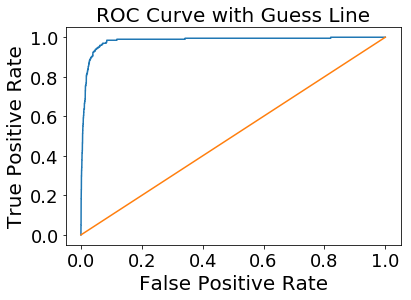

In [39]:
plt.plot(fpr,tpr)
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

In [40]:
auc

0.9818466760084329

In [41]:
nodes

30